In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [4]:
# verwaltungspolitische Karte

fp = "data/lkr_ex.shp"
map_df = gpd.read_file(fp, encoding = 'latin-1')

In [5]:
# Sortierung

map_df.head()
map_df.shape
map_df.sort_values(by=["BEZ_KRS"])
bez = map_df["BEZ_KRS"]
map_df_s = map_df.sort_values(by=["BEZ_KRS"])
map_new = map_df_s.reset_index(drop=True)
map_new




,LAND,MODELLART,OBJART,OBJART_TXT,OBJID,HDU_X,BEGINN,ENDE,ADM,AVG,BEZ_GEM,BEZ_KRS,BEZ_LAN,BEZ_RBZ,SCH,geometry
0,BY,Basis-DLM#DTK25,75007,AX_Gebiet_Kreis,DEBYBDLMjK0000mA,None,2020-09-14T21:15:59Z,None,4002,None,None,Aichach-Friedberg,Freistaat Bayern,Schwaben,09771,"POLYGON ((638012.495 5373379.867, 637982.448 5..."
1,BY,Basis-DLM#DTK25,75007,AX_Gebiet_Kreis,DEBYBDLMjK0000mu,None,2020-09-09T11:04:53Z,None,4002,None,None,Altötting,Freistaat Bayern,Oberbayern,09171,"POLYGON ((764552.871 5350954.722, 764567.870 5..."
2,BY,Basis-DLM#DTK25,75007,AX_Gebiet_Kreis,DEBYBDLMjK0000mw,None,2020-05-29T20:16:37Z,None,4003,None,None,Amberg,Freistaat Bayern,Oberpfalz,09361,"POLYGON ((706130.266 5485409.698, 706149.917 5..."
3,BY,Basis-DLM#DTK25,75007,AX_Gebiet_Kreis,DEBYBDLMjK0000mc,None,2020-10-02T21:15:01Z,None,4002,None,None,Amberg-Sulzbach,Freistaat Bayern,Oberpfalz,09371,"POLYGON ((684221.086 5488020.738, 684210.727 5..."
4,BY,Basis-DLM#DTK25,75007,AX_Gebiet_Kreis,DEBYBDLMjK0000mZ,None,2020-02-14T20:15:24Z,None,4003,None,None,Ansbach,Freistaat Bayern,Mittelfranken,09561,"POLYGON ((608987.131 5460948.780, 608979.051 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,BY,Basis-DLM#DTK25,75007,AX_Gebiet_Kreis,DEBYBDLMjK0000n2,None,2020-09-09T11:04:53Z,None,4002,None,None,Weilheim-Schongau,Freistaat Bayern,Oberbayern,09190,"POLYGON ((631688.536 5283196.749, 631702.665 5..."
92,BY,Basis-DLM#DTK25,75007,AX_Gebiet_Kreis,DEBYBDLMjK0000mJ,None,2020-10-29T21:16:41Z,None,4002,None,None,Weißenburg-Gunzenhausen,Freistaat Bayern,Mittelfranken,09577,"MULTIPOLYGON (((629979.361 5451458.245, 629984..."
93,BY,Basis-DLM#DTK25,75007,AX_Gebiet_Kreis,DEBYBDLMjK0000mC,None,2020-09-22T21:14:49Z,None,4002,None,None,Wunsiedel i.Fichtelgebirge,Freistaat Bayern,Oberfranken,09479,"POLYGON ((699431.701 5553840.858, 699421.118 5..."
94,BY,Basis-DLM#DTK25,75007,AX_Gebiet_Kreis,DEBYBDLMjK0000m7,None,2020-09-29T21:15:03Z,None,4002,None,None,Würzburg,Freistaat Bayern,Unterfranken,09679,"POLYGON ((546311.650 5511023.750, 546307.960 5..."


In [6]:
# Fachdaten
cov_df = pd.read_csv("data/covid_data_v3.csv", sep=";")
cov_df.head()

,Lkr,Einwohner,16. Mrz,17. Mrz,18. Mrz,19. Mrz,20. Mrz,21. Mrz,22. Mrz,23. Mrz,...,22. Mai,23. Mai,24. Mai,25. Mai,26. Mai,27. Mai,28. Mai,29. Mai,30. Mai,31. Mai
0,Aichach-Friedberg,133596,1,1,1,1,2,2,2,2,...,0,0,0,0,0,0,0,1,0,0
1,Altötting,111210,0,0,0,1,2,2,3,5,...,1,0,0,0,0,0,0,0,1,1
2,Amberg(kreisfreie Stadt),41970,0,1,1,1,1,1,1,2,...,1,1,1,1,1,0,0,1,1,1
3,Amberg-Sulzbach,103109,0,2,2,2,2,2,2,4,...,2,1,1,1,2,2,1,1,2,1
4,Ansbach,183949,0,0,0,0,0,2,2,3,...,1,1,1,1,1,1,1,0,0,0


<AxesSubplot:>

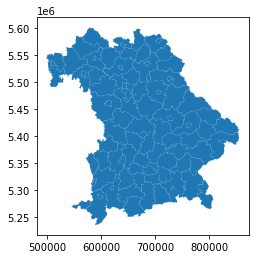

In [7]:
map_df.plot()

In [9]:
# Überprüfung des Formats
map_new.shape, cov_df.shape

((96, 16), (96, 79))

In [10]:
# Fusion beider df
fsn_df = pd.concat([map_new, cov_df], axis=1)

In [11]:
fsn_df.head()

,LAND,MODELLART,OBJART,OBJART_TXT,OBJID,HDU_X,BEGINN,ENDE,ADM,AVG,...,22. Mai,23. Mai,24. Mai,25. Mai,26. Mai,27. Mai,28. Mai,29. Mai,30. Mai,31. Mai
0,BY,Basis-DLM#DTK25,75007,AX_Gebiet_Kreis,DEBYBDLMjK0000mA,None,2020-09-14T21:15:59Z,None,4002,None,...,0,0,0,0,0,0,0,1,0,0
1,BY,Basis-DLM#DTK25,75007,AX_Gebiet_Kreis,DEBYBDLMjK0000mu,None,2020-09-09T11:04:53Z,None,4002,None,...,1,0,0,0,0,0,0,0,1,1
2,BY,Basis-DLM#DTK25,75007,AX_Gebiet_Kreis,DEBYBDLMjK0000mw,None,2020-05-29T20:16:37Z,None,4003,None,...,1,1,1,1,1,0,0,1,1,1
3,BY,Basis-DLM#DTK25,75007,AX_Gebiet_Kreis,DEBYBDLMjK0000mc,None,2020-10-02T21:15:01Z,None,4002,None,...,2,1,1,1,2,2,1,1,2,1
4,BY,Basis-DLM#DTK25,75007,AX_Gebiet_Kreis,DEBYBDLMjK0000mZ,None,2020-02-14T20:15:24Z,None,4003,None,...,1,1,1,1,1,1,1,0,0,0


In [12]:
# Test
#fsn_df["04. Apr"]

In [16]:
def Coronalage(datum):
    zeige = datum
    vmin, vmax = 0, 80
    fig, ax = plt.subplots(1, figsize=(10, 6))
    fsn_df.plot(column=zeige, cmap='Reds', linewidth=0.8, ax=ax, edgecolor="0.8")


    ax.axis('off')

    # Kartentitel
    ax.set_title('Coronalage Bayern am 01. April (Durchschnitt der letzen 7 Tage pro 100.000 Einwohner)', \
              fontdict={'fontsize': '14',
                        'fontweight' : '3'})

    # Kartenbeschreibung
    ax.annotate('Quelle: LGL Bayern, eigene Berechnungen',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

    # Legende
    sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)




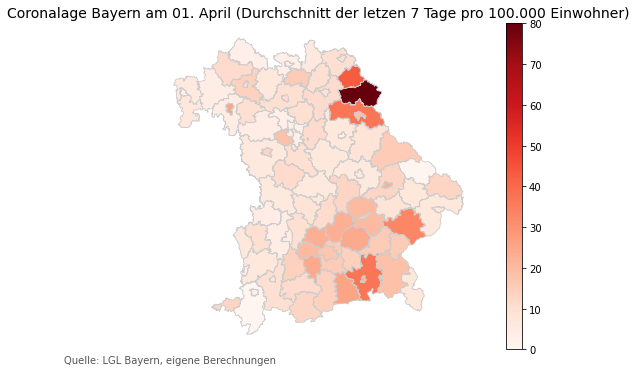

In [18]:
# Coranalage(<Datum>)
Coronalage("01. Apr")